# Programming for Data Science 2024

## Homework Assigment Three

Homework Assigment Three focus in the step-by-step implementation of a simple, yet popular, clustering algorithm, the K-Means. Although in most projects you will source algorithms from libraries such as scikit-learn or Keras, in other cases you will need to implement an algorithm yourself. For instance, if such algorithm is not available or if you want to tailor the algorithm to your problem. In that sense, learning to implement algorithms is an important part of your skillset.

This is an Individual assingment, students that are caught cheating will obtain a score of 0 points.<br>
The Homeworking Assignment Three is worth 10% of your final grade.

The submission package should correspond to a .zip archive (.rar files are not acceptable) with the following files:
1. Jupyter Notebook with the output of all the cells;
2. HTML print of your Jupyter Notebook;
3. All files outputed as part of the exercises.

The .zip archive filename should be student1ID_student2ID.

Your submission will be graded according to the following guidelines:
1. Execution (does your program does what is asked from the exercise?)
2. Objectivity (are you using the adequate libraries?)
3. Readibility of your code (that includes comments, naming of variables, supporting text, etc ...)

In some questions might require that you make critical decisions, or design choices. In such cases, you will be graded according also for your ability to justify and support your decisions.

<b>Comment your code properly, which includes naming your variables in a meaningful manner. Badly documented code will be penalized.</b>

Submission is done through the respective Moodle activity.
Deadline is November 2nd at 12:00. 
A penality of 1 point per day late will be applied to late deliveries, with a maximum of 5 days.

Please fill the following fields: <br> <br>
**Name**: João Henriques<br>
**ID**: 20240499<br>

**Name**: Marco Galão<br>
**ID**: r20201545<br>


## Clustering with K-Means

K-Means is one of the most popular "clustering" algorithms, which you perhaps are already familiar from the Data Mining curricular unit. K-means estimates the location of $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

The K-means Algorithm consists in an iterative process that is roughly as follows:
1. Choose value for K (number of clusters);
2. Initialize the locations of the centroids, which we can do by randomly select K points from your dataset as initial locations of the centroids;
3. Calculate distance of all other points to each of the K centroids;
4. Associate each point to the cluster of the closest centroid;
5. Update the centroid position, by computing the average coordinates of all points associated to each cluster;
6. Evaluate the average change in the centroids positions, as a measure of convergence (the algorithm is said to have converged to the solution when the positions of the centroids don't change more than a given tolerance threshold);
7. Repeat steps 3-6 until either the centroids no longer move more than a tolerance threshold or until you repeated these steps at least for specified number of iterations (niter)

The algorithm is thus parametized by the number of clusters (K), the maximum number of iterations (niter), and the tolerance threshold (tol).

### Step 1

Let us start by importing the necessary libraries to execute this homework. <br>
Import numpy, Scipy, and pandas using, respectively, the aliases np, sc, and pd.

In [24]:
import numpy as np
import scipy as sc
import pandas as pd

It is important that we devise a strategy to test our code at each step, in order to assess if it performs as expected. To that end, we have split each step of the algorithm into different blocks, and we ask you to test each block against a simple scenario where the outcome is predictable and can be computed by hand. In some steps, however, we want to pass a more comprehensive dataset with similar properties to the real dataset that we will be working with.<br>

Such, test datasets try to create realistic conditions in which your algorithm is expected to work correctly, and for which we can also assess if the solution matches our expectation. This allows us to have a general understanding if the algorithm performs as expected in "real-world" conditions.<br>

For this homework we will resort to a dataset that contains two clearly distinct clusters. We generated the clusters by sampling points from two distinct gaussian distributions with different averages and same standard deviation. <br>
As such, our algorithm should be able to identify each cluster easily, and place the centroids close to the averages of the two distributions. <br>

Run the cell below to download, load the data into a numpy array, and visualize your Test dataset.<br>
You will run your algorithm implementation against this dataset as a proof of work.

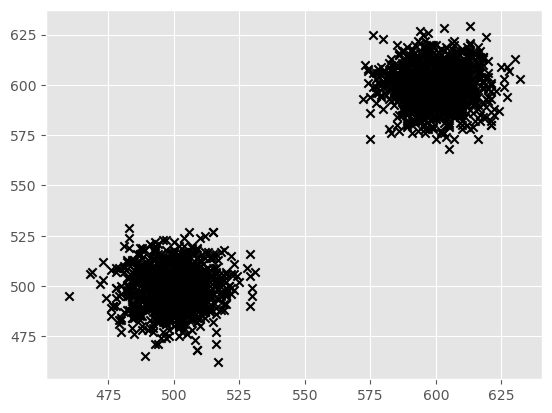

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# download the file into a dataframes and convert it to a numpy array.
data_test = pd.read_csv("https://www.dropbox.com/s/gax1l68jsarxqt9/data_test.txt?dl=1", header=None).to_numpy()

#plot the points into a scatter plot
plt.scatter(data_test[:, 0], data_test[:,1], color ='k', marker='x')

<b>Optional Challenge:</b> Can you write a function that generates an artificial dataset for testing purposes?<br>
We will award one extra point for students that offer a good implementation.

**Consider leaving this challenge to the very end of the assignment**

In [26]:
# Define the generate_dataset function
def generate_dataset(num_points=2000, mean1=(0, 0), mean2=(5, 5), stdev=1):
    """
    Generate an artificial dataset with two distinct clusters.

    Args:
    - num_points (int): Total number of points to generate.
    - mean1 (tuple): Mean of the first Gaussian distribution (cluster).
    - mean2 (tuple): Mean of the second Gaussian distribution (cluster).
    - stdev (float): Standard deviation for both distributions.

    Returns:
    - numpy.ndarray: Array containing the generated data points.
    """
    
    # Split the number of points between the two clusters
    points_per_cluster = num_points // 2
    
    # Generate points from two Gaussian distributions
    cluster1 = np.random.normal(loc=mean1, scale=stdev, size=(points_per_cluster, 2))
    cluster2 = np.random.normal(loc=mean2, scale=stdev, size=(points_per_cluster, 2))
    
    # Combine the two clusters into one dataset
    dataset = np.vstack((cluster1, cluster2))
    
    return dataset

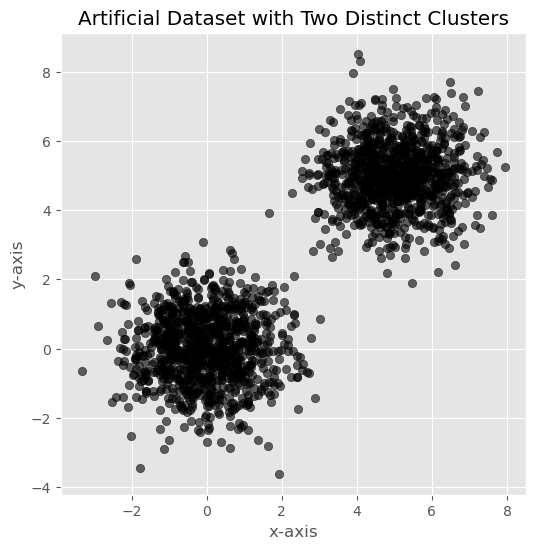

In [27]:
# Generate the dataset
dataset = generate_dataset()

# Visualize the generated dataset

# Create a figure with specified size
plt.figure(figsize=(6, 6))

# Plot the data points in a scatter plot
plt.scatter(dataset[:, 0], dataset[:, 1], color='k', marker='o', alpha=0.6)

# Add a title to the scatter plot
plt.title("Artificial Dataset with Two Distinct Clusters")

# Label the x-axis
plt.xlabel("x-axis")

# Label the y-axis
plt.ylabel("y-axis")

# Display the plot
plt.show()

### Step 2 

Write a function named <b>init</b> that takes two arguments: $points$ and $K$. <br>
The function <b>init</b> should return a numpy ndarray with  $K$ elements sampled randomly and without replacement from $points$. Meaning, the same point cannot picked up twice. <br>

**Show that your function performs as desired by calling it with** $K = 2$ **and use data_test as the** $points$

In [28]:
# Define the init function
def init(points, K):
    """
    Initialize K centroids by selecting K points, without replacement, from the dataset.
    
    Args:
    - points (numpy.ndarray): Array of data points.
    - K (int): Number of clusters (centroids) to initialize.
    
    Returns:
    - numpy.ndarray: Array of K randomly chosen points, without replacement, from the dataset.
    """

    # 1. Randomly select K indices, without replacement, from the rows of points
    k_indices = np.random.choice(len(points), K, replace=False)
    
    # 2. Use the selected indices to obtain the corresponding points from the dataset
    return points[k_indices]

In [29]:
# Testing the init function
initial_centroids = init(data_test, 2)
print("Initial centroids:\n", initial_centroids)

Initial centroids:
 [[512 487]
 [592 593]]


### Step 3

Write a function named <b>distance</b> that takes two arguments: $p1$ and $p2$. <br>
The function <b>distance</b> should return a scalar that corresponds to the euclidean distance between points $p1$ and $p2$, that should have a ndarray format. <br> 
Assume that $p1$ and $p2$ are two ndarrays of the same size.

Recall that the euclidian distance (d) between two points ($p_1$ and $p_2$) in a 2-dimensional space is given by:<br><br>
\begin{equation}
    d(p_1, p_2) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 }
\end{equation}<br>
where $p_1 = \{x_1,y_1\}$ and  $p_2 = \{x_2,y_2\}$. <br>


**1) Test that your function works by computing the distance between p1=(1,3) and p2=(7,2), which is $\approx$ 6.08.**<br>
**Consider using the existing Numpy or Scipy packages for this task.**

Can you write a function that computes the euclidean distance between two points of arbitrary dimension? <br>
In general, for arbitrary dimensionality the square of the distance can be computed as:<br><br>
\begin{equation}
    d^2(p_1, p_2) = \sum_{i=0}^{D-1} (x_i-y_i)^2
\end{equation}<br>
where $p_1 = \{x_1,x_2,...,x_{D-1}, x_D\}$ and $p_2 = \{y_1,y_2,...,y_{D-1},y_D\}$.<br>

**2) Show that your function works by computing the distance between (1,3,-9,12) and (7,2,0,5)**

***1)***

In [30]:
# Define the distance function
def distance(p1, p2):
    """
    Calculate the euclidean distance between two points in an arbitrary-dimensional space.
    
    Args:
    - p1 (numpy.ndarray): First point, a numpy array of an arbitrary dimension.
    - p2 (numpy.ndarray): Second point, a numpy array of the same dimension as p1.
    
    Returns:
    - float: Euclidean distance between points p1 and p2.
    """

    # Compute the difference, square it, then sum and take the square root
    return np.sqrt(np.sum(np.square(p1 - p2)))

In [31]:
# Test variables, do not change the values
p1 = np.array([1,3])
p2 = np.array([7,2])

# Print the result
print(f"The euclidean distance between points {p1} and {p2} is approximately {distance(p1, p2).round(2)}.")

The euclidean distance between points [1 3] and [7 2] is approximately 6.08.


***2)***

In [32]:
# Test variables, do not change the values
p1 = np.array([1,3,-9,12])
p2 = np.array([7,2,0,5])

# Print the result
print(f"The euclidean distance between points {p1} and {p2} is approximately {distance(p1, p2).round(2)}.")

The euclidean distance between points [ 1  3 -9 12] and [7 2 0 5] is approximately 12.92.


### Step 4

Write a function <b>centroid_update</b> that takes two input arguments: <i>points</i> and <i>clusters</i><br> 
The argument <i>points</i> is a ndarray containing the coordinates of a set of points (1 point per row).
The argument <i>clusters</i> is a 1-dimensional ndarray that indicates the cluster to which each point is associated.
Note that values in <i>clusters</i> are integers and can only take values between 0 and K-1, where K is the number of clusters.

The function <b>centroid_update</b> should return an ndarray with the average coordinates of the points associated to each cluster, that is the centroid of each cluster. The returned array should have the same number of columns as points and length K.

**Test your function and report the centroids generated by passing p and c as inputs with k = 3. Save these centroids as a variable: cen**

In [33]:
# Define the centroid_update function
def centroid_update(points, clusters):
    """
    Calculate the centroid of each cluster based on the input points and their associated cluster.

    Args:
    - points (numpy.ndarray): A 2D array where each row represents a point in multi-dimensional space.
    - clusters (numpy.ndarray): A 1D array of integers representing the cluster assignments for each point.

    Returns:
    - numpy.ndarray: A 2D array where each row is the centroid of a corresponding cluster.
    """
    
    # 1. Determine the number of unique clusters and the number of dimensions of the points
    unique_clusters = np.unique(clusters)
    dimensions = points.shape[1]

    # 2. Initialize the 'centroids' ndarray with zeros
    centroids = np.zeros((len(unique_clusters), dimensions))

    # 3. Loop through each cluster index to calculate the centroids
    for i in unique_clusters:
        # 3.1. Select all points that belong to the current cluster using boolean indexing
        cluster_points = points[clusters == i]
        
        # 3.2. If no points are assigned to this cluster, reinitialize the centroid to a random point from the dataset.
        # This approach ensures every cluster has a valid centroid, avoiding potential issues with empty clusters as mentioned in Step 7.
        if len(cluster_points) == 0:
            centroids[i] = points[np.random.randint(0, len(points))]
        else:
            # 3.3. Otherwise, calculate the mean of the points in the cluster
            centroids[i] = np.mean(cluster_points, axis=0)

    return centroids

In [34]:
# Test variables, do not change the values
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
c = np.array([2, 0, 0, 1, 1, 0, 0, 1, 0, 1])

# Compute the updated centroids
cen = centroid_update(p, c)
print("Updated centroids:\n", cen)

Updated centroids:
 [[0.44995487 0.55986467]
 [0.53760985 0.53912646]
 [0.8922063  0.26672425]]


### Step 5

Write a function <b>points_update</b> that takes two input arguments: $points$ and $centroids$.<br>
The function <b>points_update</b> should return a one-dimensiona ndarray that indicates the index of the centroid that is closer to each point. To determine the distance between a centroid and a point you can use your distance function you created earlier. <br>

You will need to assess the distance between each point to each centroid. Different approaches can be taken to do this. For instance, you can start by computing a d by k distance matrix matrix between each of the $d$ points and the $k$ centroids.

**Test your function by calling it and passing the array p (as defined above) with the output of centroid_update, cen, as arguments. You should get an output that looks like c defined above (but is not exactly the same, can you see why). Print this result and save it in a variable called new_clusters**

In [35]:
# Define the points_update function
def points_update(points, centroids):
    """
    Assign each point to the nearest centroid based on euclidean distance.

    Args:
    - points (numpy.ndarray): A 2D array where each row represents the coordinates of a point.
    - centroids (numpy.ndarray): A 2D array where each row represents the coordinates of a centroid.

    Returns:
    - numpy.ndarray: A 1D array containing the index of the closest centroid for each point.
    """

    # 1. Determine the number of points and the number of centroids
    num_centroids = len(centroids)
    num_points = len(points)

    # 2. Initialize the distance matrix with zeros. It has shape (num_points, num_centroids)
    distance_matrix = np.zeros((num_points, num_centroids))
    
    # 3. Loop through each point to compute distances to each centroid
    for i in range(num_points):

        # 3.1 Compute the distance between the current point and each centroid
        for j in range(num_centroids):
            distance_matrix[i, j] = distance(points[i], centroids[j])
    
    # 4. Determine the index of the closest centroid for each point using argmin row-wise
    return np.argmin(distance_matrix, axis=1)

In [36]:
# Compute the updated clusters
new_clusters = points_update(p, cen)
print("Updated clusters:", new_clusters)

Updated clusters: [2 0 0 1 2 0 1 1 0 0]


**Answering the question: "but is not exactly the same, can you see why"?**

The changes in point assignments between clusters after calling centroid_update and points_update can be attributed to the iterative nature of the K-Means clustering algorithm. The process can be summarized as follows:

1. Initial Centroids: K centroids are randomly initialized.
2. Point Assignment: Points are assigned to clusters based on their distance to these centroids.
3. Centroid Recalculation: The centroids are updated based on the mean position of the assigned points.

Because the initial clusters are based on random centroid selection, it’s expected that as centroids are recalculated and move toward points, some points may shift to a different cluster if they become closer to a different centroid. 

### Step 6

Write a function <b>error</b> that takes two input arguments: oldcentroids and newcentroids.<br>
The argument oldcentroids corresponds to a ndarray with centroid positions from the previous iteration, and newcentroids to a ndarray with the newly computed centroid positions from the current iteration. <br>

The function <b>error</b> should return the average euclidean distance between the old and new positions of each centroid. This will give us a quantity that tell us whether our algorithm is still converging to the solution or got to good approximation. We will use a tolerance threshold in the average change in the centroids positions to make this decision.

**Test your function then report the distance between the centroids calculated in Step 4, cen, and the centroids that you can calculate using the function centroid_update with the arguments points and new_clusters.**

In [37]:
# Define the error function
def error(oldcentroids, newcentroids):
    """
    Calculate the average euclidean distance between the old and new centroids.
    
    Args:
    - oldcentroids (numpy.ndarray): A 2D array of the previous centroids.
    - newcentroids (numpy.ndarray): A 2D array of the updated centroids.
        
    Returns:
    - float: The average euclidean distance between the corresponding old and new centroids.
    """

    # 1. Compute the euclidean distances between each pair of old and new centroids
    euclidean_distances = np.array([distance(oldcentroids[i], newcentroids[i]) for i in range(len(oldcentroids))])

    # 2. Return the mean of these distances
    return np.mean(euclidean_distances)

In [38]:
# Calculate new centroids based on the updated clusters
cen_new = centroid_update(p, new_clusters)

# Calculate the average euclidean distance between the old and new centroids
avg_centroids_shift = error(cen, cen_new)

# Print the result
print(f"The average distance between the old centroids and the new centroids is: {avg_centroids_shift.round(2)}")

The average distance between the old centroids and the new centroids is: 0.18


### Step 7

Write a wrapper function called <b>kmeans</b> that takes the following arguments:
- $points$, which is a ndarray of points;
- $K$, the number of clusters, set the default value to two;
- $niter$, the number of iterations;
- $tol$, the error tolerance threshold below which your algorithm should stop

The function should return:
- A one dimensional ndarray with the cluster of associated to each point,
- A ndarray with the location of the K centroids.

Use the functions you prepared in the previous Steps to assemble the function <b>kmeans</b>. <br>
Use the tolerance as a treshold to stop the algorithm, for instance by evaluating if the average variation in the distance between the new and previous coordinates of the centroids is below the tolerance level. If yes, then you can stop the algorithm and return the outputs. <br>

You will need to make some decisions about the best approach to select the correct range of values to pass to init(). Explain how you did it.

**Note: A common issue with the K-means algorithm is that in some limiting conditions it might lead to empty clusters. In that case it is expected that your algorithm to return errors. Although that is not expected to happen with the examples provided, you might want to consider implementing some heuristics to overcome those errors. However, such is an optional task, and for this homework if you bump into such errors we recommend you try to rerun your code.**

In [39]:
# Define the kmeans function
def kmeans(points, K=2, niter=300, tol=0.0001):
    """
    Perform K-means clustering algorithm.

    Args:
    - points (numpy.ndarray): A 2D array where each row represents a point in multi-dimensional space.
    - K (int): The number of clusters (default is 2).
    - niter (int): The maximum number of iterations (default is 300).
    - tol (float): The tolerance threshold for stopping the algorithm (default is 0.0001).

    Returns:
    - tuple: A tuple containing:
        - current_clusters (numpy.ndarray): A 1D array indicating the cluster assignment for each point.
        - current_centroids (numpy.ndarray): A 2D array containing the final centroid positions.
    """

    # 1. Randomly initialize the centroids using the init function
    current_centroids = init(points, K)

    # 2. Assign initial clusters based on the initial centroids
    current_clusters = points_update(points, current_centroids)

    # 3. Initialize variables to track the convergence criteria
    iteration_count = 0
    error_level = float('inf')
    
    while iteration_count < niter and error_level >= tol:
        # Increment the iteration counter
        iteration_count += 1  
        
        # 4. Update centroids based on the current cluster assignments,
        # addressing any empty clusters as defined in the centroid_update function (step 4).
        new_centroids = centroid_update(points, current_clusters)

        # 5. Reassign points to new clusters based on updated centroids
        current_clusters = points_update(points, new_centroids)
        
        # 6. Calculate the error (average distance) between the old and new centroids
        error_level = error(current_centroids, new_centroids)
        
        # 7. Update current centroids for the next iteration
        current_centroids = new_centroids

    return current_clusters, current_centroids

**Justification for Parameters:**

- K (number of clusters): We set K to 2, as this homework uses a dataset with two clearly distinct clusters (as mentioned in step 1), making it a suitable choice for effective clustering.
- niter (number of iterations): We set niter to 300, which is the default value from sklearn. This provides sufficient iterations for convergence without excessive computation.
- tol (tolerance): We set tol to 0.0001, also the default in sklearn. This threshold allows the algorithm to stop once the change in centroid positions is minimal, ensuring efficiency while achieving a good approximation.

It is useful to visually inspect the results in order to assess the performance of the clustering algorthim. <br>
Below is an example of how you can visualize your results for a sample dataset. <br>
Can you adapt the code to show your results applied to data_test with K = 2, niter = 500, tol = 0.00001.

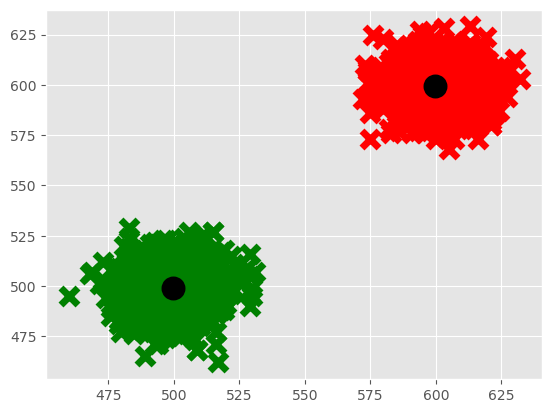

In [40]:
#boilerplate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# let us define the style of the plot here
style.use('ggplot')
colors = ["g","r"]

# Call kmeans function on data_test with specified parameters
clusters, centroids = kmeans(data_test, K=2, niter=500, tol=0.00001)

# Plot each point in the points array, colored according to the cluster they belong
for i in range(len(clusters)):
    plt.scatter(data_test[i,0],data_test[i,1], marker="x", color=colors[clusters[i]], s=150, linewidths=5)

# Plot each point in the centroids array (after plotting the points, to keep the centroids visible)
for centroid in centroids:
    plt.scatter(centroid[0],centroid[1], marker="o", color="k", s=150, linewidths=5)
    
# Plot all elements
plt.show()

### Step 8

Write a function <b>inertia</b> that takes three input arguments: $points$, $clusters$, and $centroids$.<br>
Where $points$ is an 2-dimensional ndarray with the coordinates of each point in your dataset, clusters is a vector that indicates the cluster of each point (takes values between $0$ and $K-1$), and $centroids$ is a 2-dimensional ndarray with length $k$ of the coordinates of the centroids.

The function should return a tuple in which the first value is the number of clusters and the second is the computed **average squared distance** of the points to the centroid of the cluster they are assigned.

**Test your function and report the results of using point=p, clusters=c, and centroids=cen. These are the quantities that you computed above in the different steps**

In [41]:
# Define the compute_inertia function

# We changed the name to "compute_inertia" to avoid conflicts that were causing an error
# in step 9, when calling the function to generate the elbow method
def compute_inertia(points, clusters, centroids): 
    """
    Calculate the average squared distance (inertia) of points to their respective cluster centroids.

    Args:
    - points (numpy.ndarray): 2D array where each row represents the coordinates of a point in the dataset.
    - clusters (numpy.ndarray): 1D array indicating the cluster assignment of each point (values from 0 to K-1).
    - centroids (numpy.ndarray): 2D array where each row represents the coordinates of a cluster centroid.

    Returns:
    - tuple: A tuple containing:
        - num_clusters (int): The number of clusters (K).
        - avg_squared_distance (float): The average squared distance of points to their assigned cluster centroids.
    """
    
    # List to store the squared distance of each point to its assigned cluster centroid
    squared_distances = []
    
    # Calculate the squared distance of each point to its assigned cluster centroid
    for i, point in enumerate(points):
        # Find the centroid corresponding to the cluster assignment of the current point
        centroid = centroids[clusters[i]]
        
        # Calculate and store the squared distance between the point and its assigned centroid
        squared_distances.append(np.square(distance(point, centroid)))
    
    # Determine the number of clusters and the mean of the squared distances
    num_clusters = len(np.unique(clusters))
    avg_squared_distance = np.mean(squared_distances)

    return num_clusters, avg_squared_distance

In [42]:
# Test the function with given data
num_clusters, avg_squared_distance = compute_inertia(p, c, cen)
print("Number of clusters:", num_clusters)
print("Inertia:", avg_squared_distance.round(2))

Number of clusters: 3
Inertia: 0.11


### Step 9

Load the data from file https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1 into numpy array.<br>
The data consists of the coordinates of $N$ points in a 2-dimensional space. <br>
Use the functions <b>kmeans</b> and <b>internia</b> to identify the most suitable number of clusters. <br>
You might want to consider doing some visual inspection and reporting. <br>
For instance, inspect visually the dataset before performing the clustering; report the inertia values as a line plot; show the result of your clustering.

Tip: use the output of inertia to perform the elbow method https://en.wikipedia.org/wiki/Elbow_method_(clustering).

<img src="images/example_plot.png" alt="Alt text" width="700"/>

### 1. Download the file into a DataFrame and convert it to a NumPy array

In [43]:
# Download the file into a DataFrame and convert it to a NumPy array
data = pd.read_csv("https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1", header=None).to_numpy()

### 2. Inspect the dataset visually before performing clustering

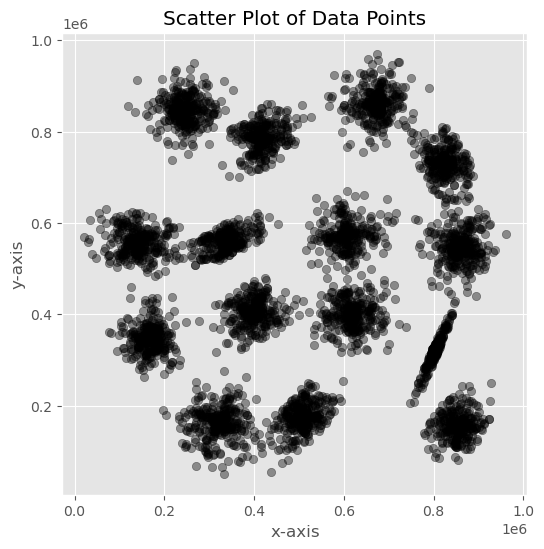

In [44]:
# Create a figure with specified size
plt.figure(figsize=(6, 6))

# Plot the data points in a scatter plot
plt.scatter(data[:, 0], data[:, 1], color="k", marker="o", alpha=0.4)

# Add a title to the scatter plot
plt.title("Scatter Plot of Data Points")

# Label the x-axis
plt.xlabel("x-axis")

# Label the y-axis
plt.ylabel("y-axis")

# Display the plot
plt.show()

### 3. Elbow method for determining optimal K

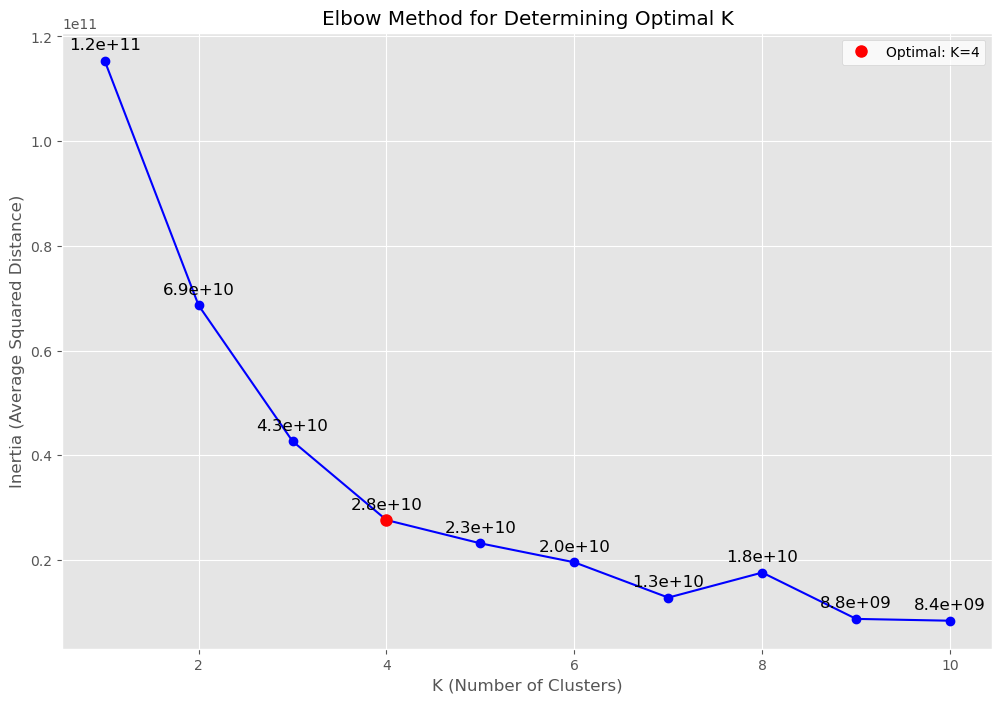

In [45]:
# Define the range of K values to test for clustering
k_values = range(1, 11)

# Initialize an empty list to store the calculated inertia values for each K
inertia_values = []

# Loop through each K value to perform clustering and calculate inertia
for k in k_values:
    # Perform K-means clustering on the data with the specified k
    clusters, centroids = kmeans(data, K=k, niter=500, tol=0.00001)
    
    # Calculate the inertia for the current clustering
    _, inertia = compute_inertia(data, clusters, centroids)

    # Append the calculated inertia to the list
    inertia_values.append(inertia)

# Create a plot to visualize inertia against the number of clusters (K)
plt.figure(figsize=(12, 8))
plt.plot(k_values, inertia_values, "bo-")

# Define the optimal K value determined from the elbow method analysis
optimal_k = 4

# Highlight the marker for the optimal K (4)
plt.plot(optimal_k, inertia_values[optimal_k - 1], "ro", markersize=8, label="Optimal: K=4")

# Annotate each point on the plot with its corresponding inertia value
for i, inertia in enumerate(inertia_values):
    plt.annotate(f"{inertia:.1e}", (k_values[i], inertia), textcoords="offset points", xytext=(0, 8), 
                 ha="center", fontsize=12)

# Set labels for the axes
plt.xlabel("K (Number of Clusters)")
plt.ylabel("Inertia (Average Squared Distance)")

# Set a title for the plot
plt.title("Elbow Method for Determining Optimal K")

# Display the legend
plt.legend(facecolor="white")

# Display the plot
plt.show()

**Decision:** The elbow plot shows a significant decrease in inertia from K = 3 to K = 4, with diminishing returns for higher K values. Therefore, we chose K = 4 as the optimal number of clusters.

### 4. Show the K-means clustering result

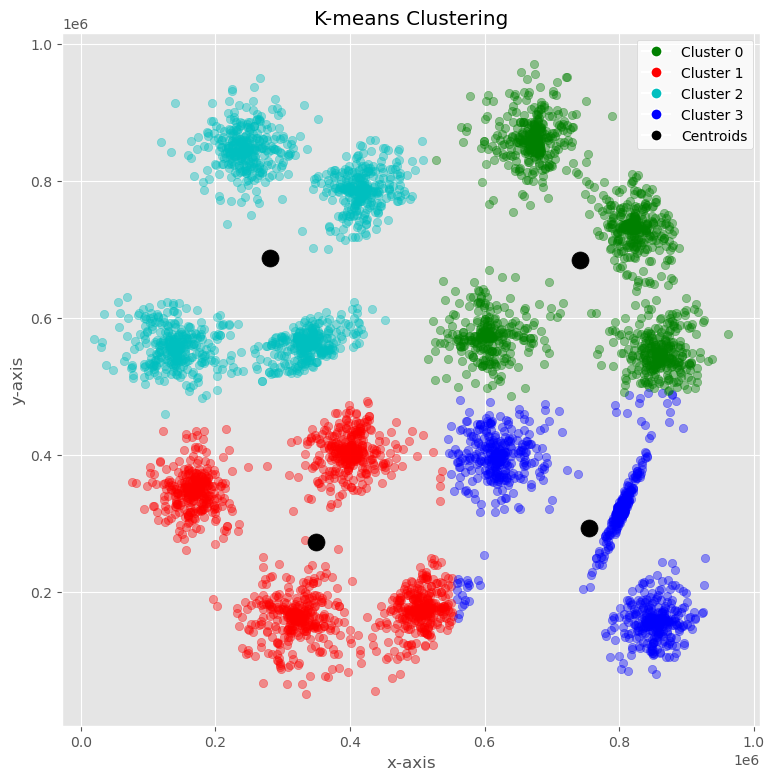

In [46]:
# Import the 'ggplot' style
style.use('ggplot')

# Define a list of colors to represent clusters
colors = ["g", "r", "c", "b"]

# Perform K-means clustering on the dataset using the optimal number of clusters
clusters, centroids = kmeans(data, K=optimal_k, niter=500, tol=0.00001)

# Create a figure with a specified size
plt.figure(figsize=(9, 9))

# Plot each data point, coloring them based on their assigned cluster
for i in range(len(clusters)):
    plt.scatter(data[i, 0], data[i, 1], marker="o", color=colors[clusters[i]], alpha=0.4)

# Plot each centroid as a larger black circle
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], marker="o", color="k", s=150)

# Prepare legend labels for clusters and centroids
legend_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Centroids']

# Create custom legend handles for clusters using the defined colors
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=8) for i in range(optimal_k)]

# Append a handle for centroids using a black color
handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=8))

# Set labels for the axes
plt.xlabel("x-axis")
plt.ylabel("y-axis")

# Set a title for the plot
plt.title("K-means Clustering")

# Create the legend with the defined handles and labels
plt.legend(handles, legend_labels, facecolor='white')

# Display the plot
plt.show()